Introduction of Customer_Churn :- 

Customer churn refers to the phenomenon where customers end their relationship with a company or service provider, typically by canceling their subscriptions or contracts and moving to a competitor or discontinuing the service altogether.

In this analysis, I am working with the "Telecom-Customer-Churn.csv" dataset, which contains information related to customer churn in a telecom company. The dataset includes various attributes such as customer demographics, services subscribed, contract details, and churn status. We aim to explore factors influencing customer churn and visualize patterns using Python's Pandas for data manipulation and Seaborn/Matplotlib for data visualization.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use raw string to avoid issues with backslashes in the file path
df = pd.read_csv(r"C:\Users\Shivam Kumar\Desktop\Telecom-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In my analysis of telecom customer churn using the "Telecom-Customer-Churn.csv" dataset, I've streamlined my data by removing unnecessary columns. This process ensures we focus only on the most relevant factors influencing customer retention and satisfaction.

In [67]:
# Dropping the unuseful columns and data from the csv file
df.drop(df.columns[[13, 14, 16]], axis=1, inplace=True)
if "StreamingTV" not in df.columns and "StreamingMovies" not in df.columns and "PaperlessBilling" not in df.columns:
    print("Columns are dropped Successfully. :)")
else:
    print("Columns not dropped. :(")

df.info() #Displaying the data after removal of unnecessary data

Columns are dropped Successfully. :)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  Total

In [4]:
# Identifying null values

df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,MonthlyCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In my analysis I've replaced occurrences of "No" with NaN values. This approach allows us to effectively manage missing or irrelevant data entries, ensuring our analysis focuses on accurate and meaningful insights into customer behavior and service usage.

In [55]:
import pandas as pd
import numpy as np

# Display the first few rows of the DataFrame
print("Original DataFrame:\n", df.head())

# Replace "no" with NaN
df.replace("No", np.nan, inplace=True, regex=True)  # Use regex=True to handle case sensitivity if needed

# Display the modified DataFrame
print("\nModified DataFrame with 'No' replaced by NaN:\n", df.head())

# Summary of NaN values in each column
print("\nSummary of NaN values in each column:\n", df.isnull().sum())

Original DataFrame:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes        NaN       1          NaN   
1  5575-GNVDE    Male              0     NaN        NaN      34          Yes   
2  3668-QPYBK    Male              0     NaN        NaN       2          Yes   
3  7795-CFOCW    Male              0     NaN        NaN      45          NaN   
4  9237-HQITU  Female              0     NaN        NaN       2          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0           NaN             DSL            NaN          Yes              NaN   
1           NaN             DSL            Yes          NaN              Yes   
2           NaN             DSL            Yes          Yes              NaN   
3           NaN             DSL            Yes          NaN              Yes   
4           NaN     Fiber optic            NaN          NaN              NaN   

  TechSupport    

To display the first few rows of the DataFrame df, we can use df.head() in Python after loading or manipulating the DataFrame. 

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,NaN,1,NaN,NaN,DSL,NaN,Yes,NaN,NaN,29.85,NaN
1,5575-GNVDE,Male,0,NaN,NaN,34,Yes,NaN,DSL,Yes,NaN,Yes,NaN,56.95,NaN
2,3668-QPYBK,Male,0,NaN,NaN,2,Yes,NaN,DSL,Yes,Yes,NaN,NaN,53.85,Yes
3,7795-CFOCW,Male,0,NaN,NaN,45,NaN,NaN,DSL,Yes,NaN,Yes,Yes,42.30,NaN
4,9237-HQITU,Female,0,NaN,NaN,2,Yes,NaN,Fiber optic,NaN,NaN,NaN,NaN,70.70,Yes


To check for null (missing) values in your DataFrame df, we can use the .isnull() method. 

In [7]:

df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,MonthlyCharges,Churn
0,False,False,False,False,True,False,True,True,False,True,False,True,True,False,True
1,False,False,False,True,True,False,False,True,False,False,True,False,True,False,True
2,False,False,False,True,True,False,False,True,False,False,False,True,True,False,False
3,False,False,False,True,True,False,True,True,False,False,True,False,False,False,True
4,False,False,False,True,True,False,False,True,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
7039,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
7040,False,False,False,False,False,False,True,True,False,False,True,True,True,False,True
7041,False,False,False,False,True,False,False,False,False,True,True,True,True,False,False


In [8]:
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner             3641
Dependents          4933
tenure                 0
PhoneService         682
MultipleLines       4072
InternetService     1526
OnlineSecurity      5024
OnlineBackup        4614
DeviceProtection    4621
TechSupport         4999
MonthlyCharges         0
Churn               5174
dtype: int64

In our analysis I've examined the number of unique values in each dataset column. This exploration provides insights into the diversity and distribution of data attributes.

In [ ]:
for i in df.columns:
    print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in customerID is 7043
No. of unique values in gender is 2
No. of unique values in SeniorCitizen is 2
No. of unique values in Partner is 2
No. of unique values in Dependents is 2
No. of unique values in tenure is 73
No. of unique values in PhoneService is 2
No. of unique values in MultipleLines is 3
No. of unique values in InternetService is 3
No. of unique values in OnlineSecurity is 3
No. of unique values in OnlineBackup is 3
No. of unique values in DeviceProtection is 3
No. of unique values in TechSupport is 3
No. of unique values in Contract is 3
No. of unique values in PaymentMethod is 4
No. of unique values in MonthlyCharges is 1585
No. of unique values in TotalCharges is 6531
No. of unique values in Churn is 2


In [9]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           3402 non-null   object 
 4   Dependents        2110 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      6361 non-null   object 
 7   MultipleLines     2971 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    2019 non-null   object 
 10  OnlineBackup      2429 non-null   object 
 11  DeviceProtection  2422 non-null   object 
 12  TechSupport       2044 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  Churn             1869 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 825.5+ KB
None
        customerID gende

Now to filtered the dataset to focus only on customers who do not have phone service. 

In [17]:
mask = df["PhoneService"] == "No"
df.loc[mask]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,One year,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,Month-to-month,Mailed check,29.75,301.9,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,Month-to-month,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Electronic check,30.20,30.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,Month-to-month,Electronic check,35.75,1022.5,No
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Two year,Bank transfer (automatic),63.10,4685.55,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Month-to-month,Electronic check,44.40,263.05,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,One year,Electronic check,60.65,743.3,No


 Now I've categorized customers into churned and non-churned groups to understand their distribution. By visualizing and counting these segments, we gain insights into the prevalence and dynamics of customer retention within the telecom industry.

Number of Customers who are Churned:
 customerID
8361-LTMKD    1
3668-QPYBK    1
9237-HQITU    1
9305-CDSKC    1
7892-POOKP    1
             ..
1658-BYGOY    1
7495-OOKFY    1
9420-LOJKX    1
7760-OYPDY    1
8168-UQWWF    1
Name: count, Length: 1869, dtype: int64
Number of customers who are not churned:
 customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
7795-CFOCW    1
1452-KIOVK    1
             ..
3655-SNQYZ    1
5129-JLPIS    1
8091-TTVAX    1
7469-LKBCI    1
9763-GRSKD    1
Name: count, Length: 5174, dtype: int64


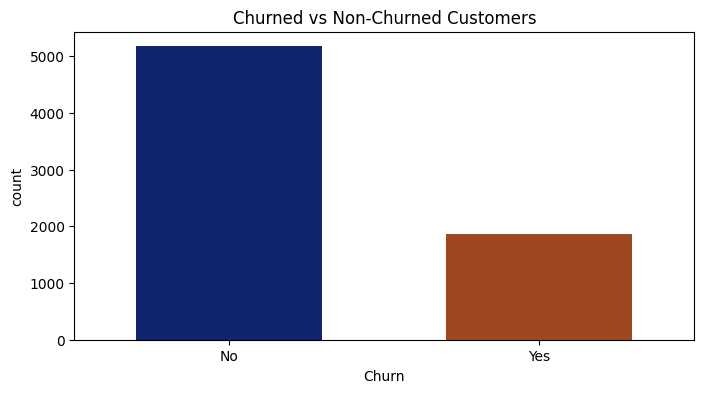

In [51]:
# Common Variables
mask = df["Churn"] == "Yes"
mask2 = df["Churn"] == "No"
churned = df[mask]
not_churned = df[mask2]

# Collecting the number of customers who are churned and who are not churned
print("Number of Customers who are Churned:\n", churned["customerID"].value_counts())
print("Number of customers who are not churned:\n", not_churned["customerID"].value_counts())

# Plotting the count of churned and non-churned customers 
plt.figure(figsize=(8, 4))
plt.title("Churned vs Non-Churned Customers")
sns.countplot(data=df, x="Churn", hue="Churn", palette="dark", dodge=False, width=0.6)  # Adjust width here
plt.grid(False)  # Remove grid lines
plt.show()


Examining gender differences among telecom customers who have churned and those who haven't. By counting and comparing gender distributions, we aim to uncover any patterns that may influence customer retention in the telecom industry.

In [20]:
# Count gender rate of churned customers
churned_gender_counts = df[df['Churn'] == 'Yes']['gender'].value_counts()

# Count gender rate of non-churned customers, ensuring all genders are accounted for
non_churned_gender_counts = df[df['Churn'] == 'No']['gender'].value_counts()

# Ensure all specified genders are included, even if they have zero counts
all_genders = ['Female', 'Male']
for gender in all_genders:
    if gender not in non_churned_gender_counts.index:
        non_churned_gender_counts[gender] = 0

print("Churned Customers Gender-wise:")
print(churned_gender_counts)
print("\nNon-Churned Customers Gender-wise:")
print(non_churned_gender_counts)


Churned Customers Gender-wise:
gender
Female    939
Male      930
Name: count, dtype: int64

Non-Churned Customers Gender-wise:
gender
Male      2625
Female    2549
Name: count, dtype: int64


Number of males and females : 
gender
Female    939
Male      930
Name: count, dtype: int64


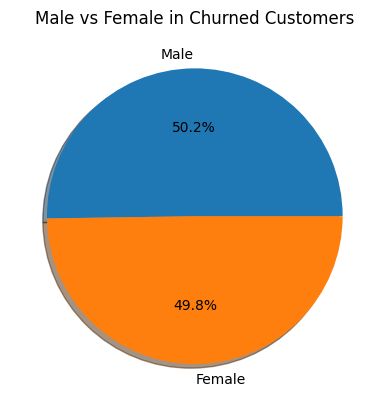

In [49]:
# Comparing the between the genders who are customer churned
churned = df[mask]
gender_count = churned["gender"].value_counts()
print("Number of males and females : ")
print(gender_count)
gender_plot = df.loc[mask, ["customerID", "gender"]]
plt.title("Male vs Female in Churned Customers")
plt.pie(gender_count, labels=["Male", "Female"], autopct="%1.1f%%", shadow=True)
plt.show()

Eamining how senior citizen status varies between telecom customers who have churned and those who haven't, categorized by gender. This visual comparison helps us understand if there are any differences in churn patterns based on age among different genders.

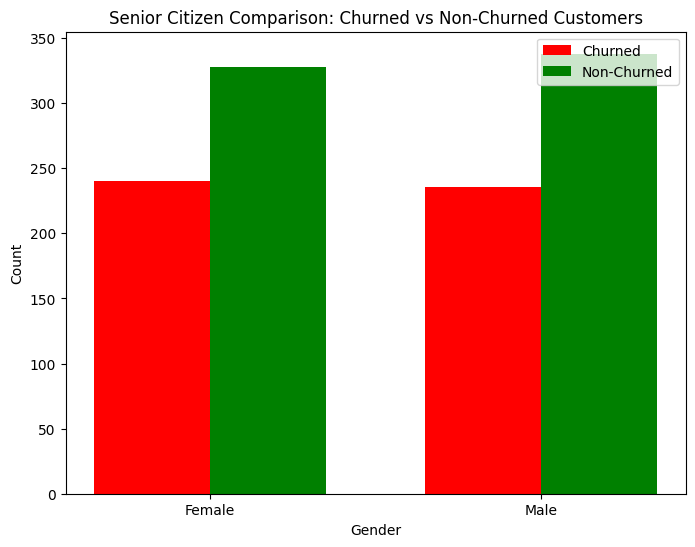

In [52]:
# Common Variables
mask = df["Churn"] == "Yes"
mask2 = df["Churn"] == "No"
churned = df[mask]
not_churned = df[mask2]

churned_counts = churned.groupby("gender")["SeniorCitizen"].sum()
not_churned_counts = not_churned.groupby("gender")["SeniorCitizen"].sum()

# Plotting the comparison
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(churned_counts))
plt.bar(index, churned_counts, bar_width, color="red", label="Churned")
plt.bar([i + bar_width for i in index], not_churned_counts, bar_width, color="green", label="Non-Churned")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Senior Citizen Comparison: Churned vs Non-Churned Customers')
plt.xticks([i + bar_width/2 for i in index], churned_counts.index)  # Use index of churned_counts for xticks
plt.legend()
plt.show()

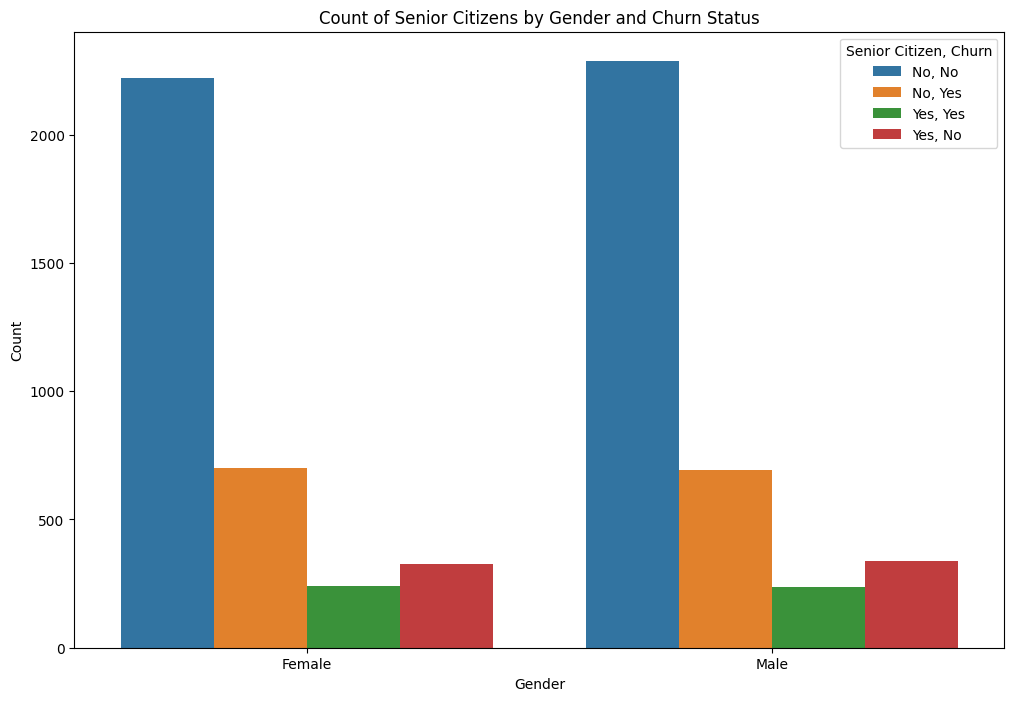

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Shivam Kumar\Desktop\Telecom-Customer-Churn.csv")

# Map SeniorCitizen values to 'Yes' and 'No'
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Combine SeniorCitizen and Churn into a single column for hue
df['SeniorCitizen_Churn'] = df['SeniorCitizen'] + ', ' + df['Churn']

# Create the count plot with the combined hue
plt.figure(figsize=(12, 8))
sns.countplot(x='gender', hue='SeniorCitizen_Churn', data=df)
plt.title('Count of Senior Citizens by Gender and Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Senior Citizen, Churn', loc='upper right')
plt.show()


Examining how customers are distributed across different types of Internet services based on gender. This provides insights into the gender-specific usage patterns within various Internet service categories.

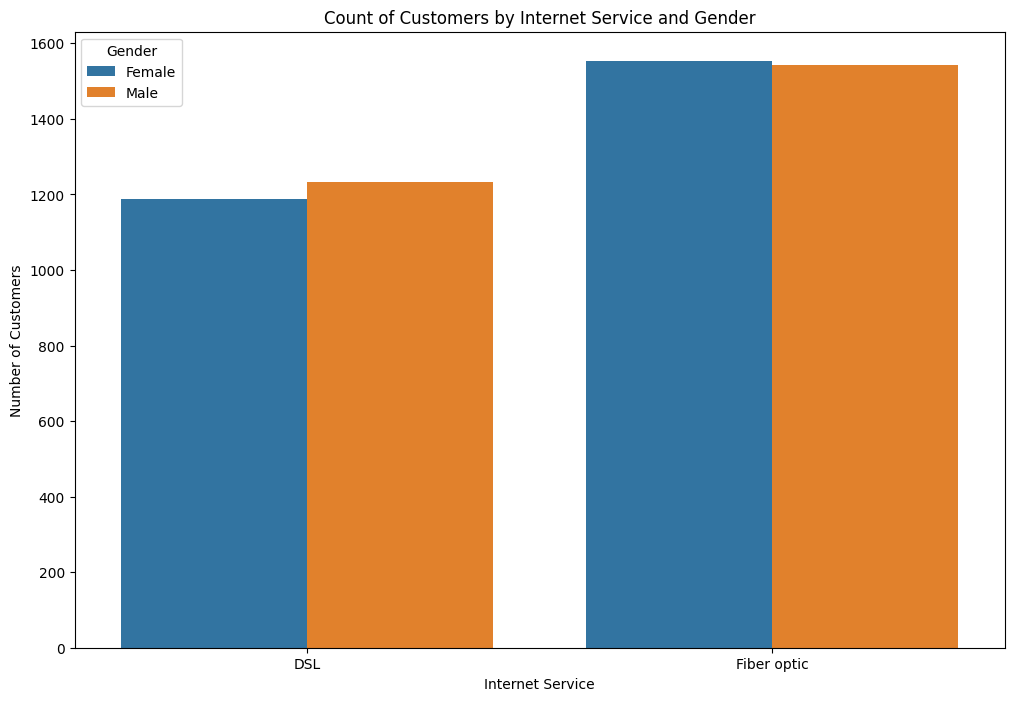

In [ ]:

# Grouped bar chart to count Customers by Internet Service and Gender
plt.figure(figsize=(12, 8))
sns.countplot(x='InternetService', hue='gender', data=df)
plt.title('Count of Customers by Internet Service and Gender')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.legend(title='Gender', loc='upper left')
plt.show()


Examining how tenure (customer subscription duration) varies between customers who have churned and those who haven't. This visualizes the distribution, highlighting differences in subscription lengths among churned ('Yes') and non-churned ('No') customers.

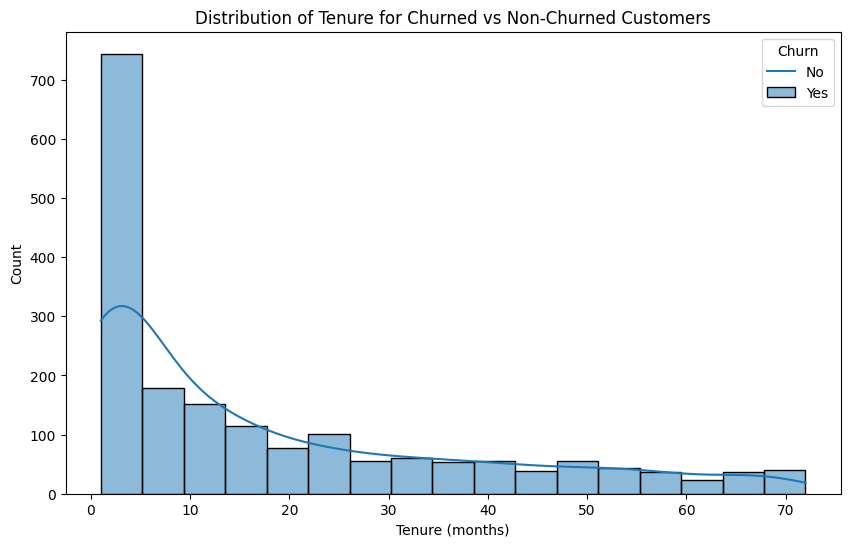

In [ ]:
# Plotting distribution of tenure for churned vs non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True)
plt.title('Distribution of Tenure for Churned vs Non-Churned Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

  Visualizing how monthly charges vary across these two groups, providing insights into potential patterns or differences in pricing strategies affecting customer churn.

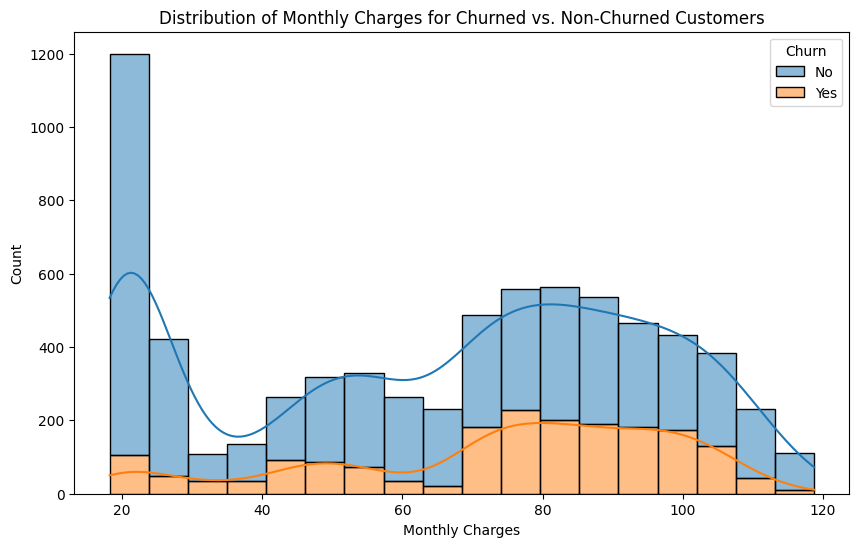

In [56]:

# Create a histogram to compare Monthly Charges for Churned vs. Non-Churned Customers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Monthly Charges for Churned vs. Non-Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()


Illustrating the churn rates among different contract types (Month-to-month, One year, Two year). It visually represents how customers' contract durations influence their likelihood to churn, providing insights into contract retention strategies.

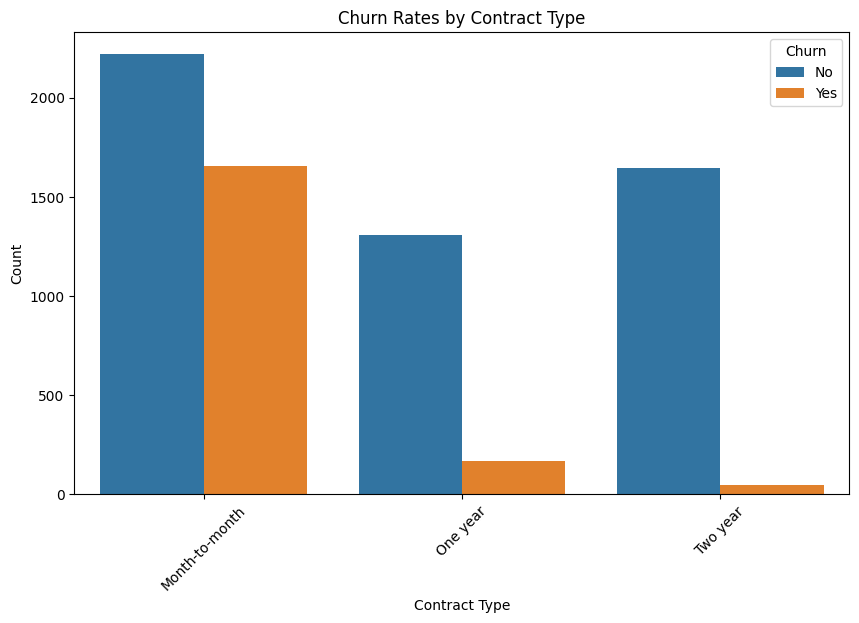

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting churn rates by Contract type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rates by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

 Displaying the average tenure (in months) of customers who have churned, categorized by different contract types (Month-to-month, One year, Two year). It visualizes how contract duration influences customer retention, providing insights into contract management strategies.

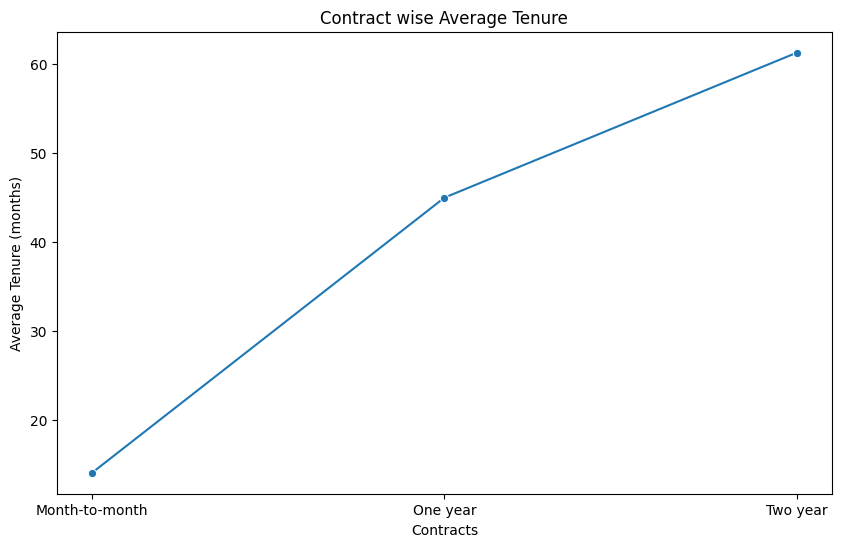

In [3]:
# Filter the churned customers
churned = df[df['Churn'] == 'Yes']

# Calculate the average tenure by each category of contracts
avg_tenure = churned.groupby('Contract')['tenure'].mean().reset_index()

# Plot the average tenure by contract type
plt.figure(figsize=(10, 6))
plt.title("Contract wise Average Tenure")
sns.lineplot(x="Contract", y="tenure", data=avg_tenure, marker='o')
plt.xlabel("Contracts")
plt.ylabel("Average Tenure (months)")
plt.show()


 Illustrating the distribution of telecom customers based on their phone service status and usage of multiple lines, categorized by churn status ('Yes' and 'No').

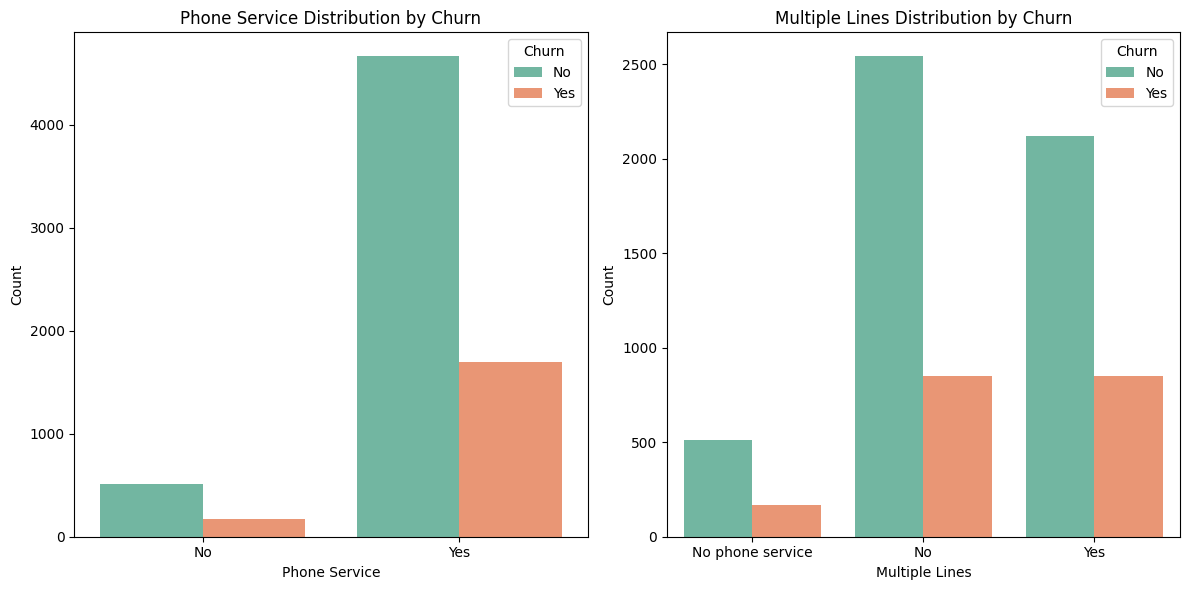

In [14]:


# Create a count plot for PhoneService and MultipleLines
plt.figure(figsize=(12, 6))

# Plot 1: Distribution of PhoneService
plt.subplot(1, 2, 1)
sns.countplot(x='PhoneService', hue='Churn', data=df, palette='Set2')
plt.title('Phone Service Distribution by Churn')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])

# Plot 2: Distribution of MultipleLines
plt.subplot(1, 2, 2)
sns.countplot(x='MultipleLines', hue='Churn', data=df, palette='Set2')
plt.title('Multiple Lines Distribution by Churn')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


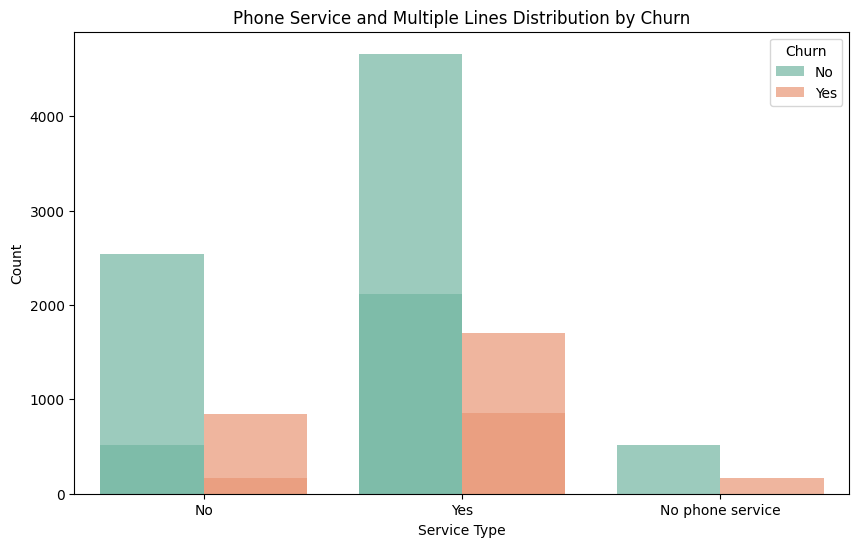

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for PhoneService and MultipleLines on the same graph
plt.figure(figsize=(10, 6))
sns.countplot(x='PhoneService', hue='Churn', data=df, palette='Set2', alpha=0.7)
sns.countplot(x='MultipleLines', hue='Churn', data=df, palette='Set2', alpha=0.7)

# Add title and labels
plt.title('Phone Service and Multiple Lines Distribution by Churn')
plt.xlabel('Service Type')
plt.ylabel('Count')

# Add legend
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])

plt.show()


Compararing the usage of different payment methods between customers who have churned (stopped using the service) and those who have not in a telecom dataset.

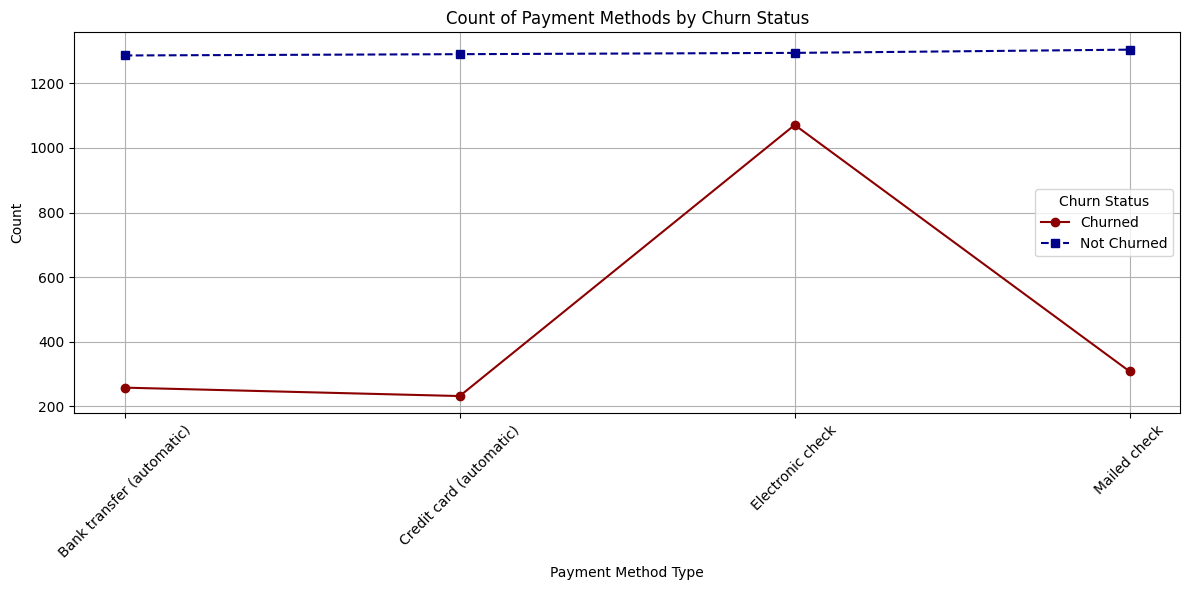

In [68]:

# Filter the churned and non-churned customers
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Comparing the data of types of payment methods used by churned and non-churned customers
method1 = churned["PaymentMethod"].value_counts()
method2 = not_churned["PaymentMethod"].value_counts()

# Combine the two Series into a DataFrame for easier plotting
combined_methods = pd.DataFrame({
    'Churned': method1,
    'Not Churned': method2
}).fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(combined_methods.index, combined_methods['Churned'], marker='o', linestyle='-', color='darkred', label='Churned')
plt.plot(combined_methods.index, combined_methods['Not Churned'], marker='s', linestyle='--', color='darkblue', label='Not Churned')

plt.title("Count of Payment Methods by Churn Status")
plt.xlabel("Payment Method Type")
plt.ylabel("Count")
plt.legend(title="Churn Status")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Examining the churn rates (%) associated with different telecom services including Online Security, Online Backup, Device Protection, and Tech Support.

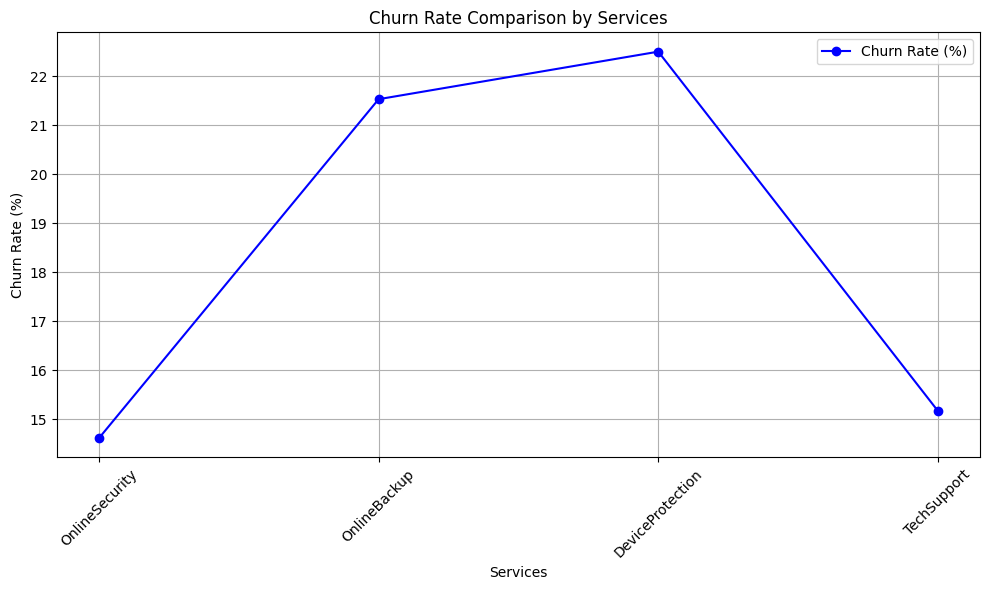

In [20]:
# Calculate churn rates (%) for each service
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
churn_rates = []
for service in services:
    service_churn_rate = df[df[service] == 'Yes']['Churn'].value_counts(normalize=True).mul(100).get('Yes', 0)
    churn_rates.append(service_churn_rate)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(services, churn_rates, marker='o', linestyle='-', color='b', label='Churn Rate (%)')
plt.title('Churn Rate Comparison by Services')
plt.xlabel('Services')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Calculating the average tenure of churned customers grouped by contract type (avg_tenure) and then plots a boxplot showing the distribution of tenure for each contract type.

Average Tenure of churned customers :
 Contract
Month-to-month    14.016918
One year          44.963855
Two year          61.270833
Name: tenure, dtype: float64


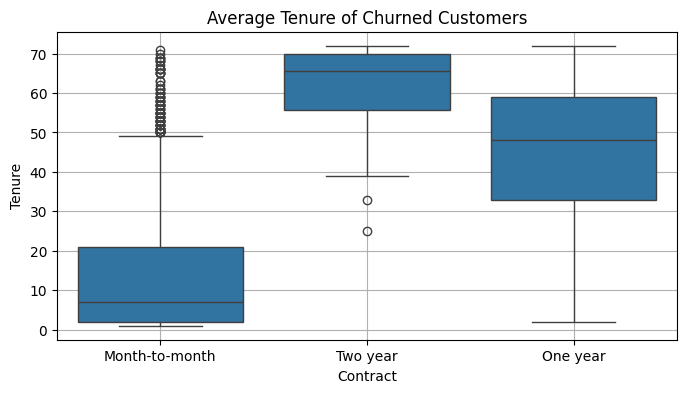

In [38]:
# Plotting the Average tenure of the Churned customers
avg_tenure = churned.groupby("Contract")["tenure"].mean()
print("Average Tenure of churned customers :\n", avg_tenure)
plt.figure(figsize=(8, 4))
plt.title("Average Tenure of Churned Customers")
sns.boxplot(x="Contract", y="tenure", data=churned)
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.grid(True)
plt.show()

Examining the average monthly charges of customers who have churned, categorized by different contract types. This helps in understanding how monthly charges vary among customers who churned based on their contract agreements.

Average Monthly Charges of churned customers :
 Contract
Month-to-month    73.019396
One year          85.050904
Two year          86.777083
Name: MonthlyCharges, dtype: float64


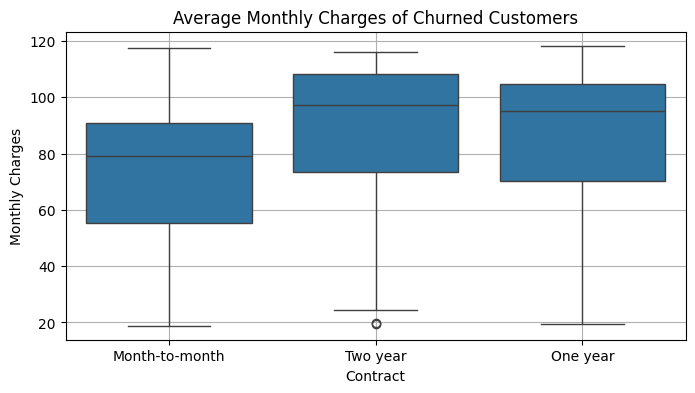

In [32]:
# Plotting the Average Monthly Charges of the Churned customers
avg_monthly = churned.groupby("Contract")["MonthlyCharges"].mean()
print("Average Monthly Charges of churned customers :\n", avg_monthly)
plt.figure(figsize=(8, 4))
plt.title("Average Monthly Charges of Churned Customers")
sns.boxplot(x="Contract", y="MonthlyCharges", data=churned)
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.show()

Visualizing the average total charges of churned customers across different contract types using a boxplot. This helps in understanding how total charges vary among customers who have churned, categorized by their contract types.

Average Total Charges of churned customers :
 Contract
Month-to-month    1164.460574
One year          4066.212048
Two year          5432.363542
Name: TotalCharges, dtype: float64


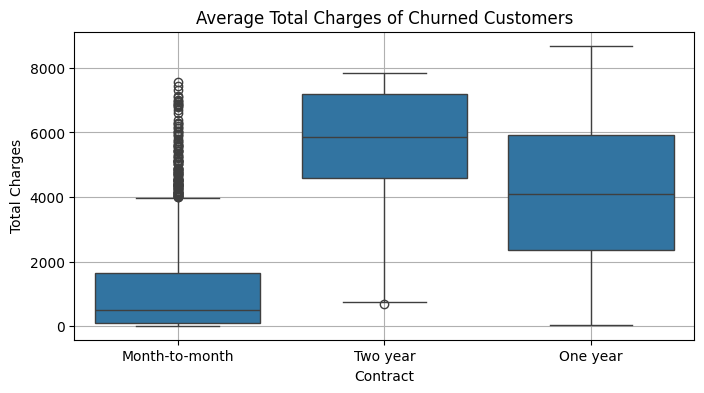

In [33]:
# Create a copy of the churned DataFrame to avoid SettingWithCopyWarning
churned_copy = churned.copy()

# Converting 'TotalCharges' to numeric and handling NaN values
churned_copy["TotalCharges"] = pd.to_numeric(churned_copy["TotalCharges"], errors="coerce")
churned_copy["TotalCharges"] = churned_copy["TotalCharges"].fillna(churned_copy["TotalCharges"].mean())  # Fill NaN values with mean

# Plotting the Average Total Charges of the Churned customers
avg_total = churned_copy.groupby("Contract")["TotalCharges"].mean()
print("Average Total Charges of churned customers :\n", avg_total)
plt.figure(figsize=(8, 4))
plt.title("Average Total Charges of Churned Customers")
sns.boxplot(x="Contract", y="TotalCharges", data=churned_copy)
plt.xlabel('Contract')
plt.ylabel('Total Charges')
plt.grid(True)
plt.show()


Visualizing the average tenure (duration of service) of customers who have churned, categorized by different payment methods. This helps in understanding how tenure varies among churned customers based on their chosen payment methods.

Average Tenure of churned customers by Payment Method :
 PaymentMethod
Bank transfer (automatic)    26.290698
Credit card (automatic)      27.521552
Electronic check             16.763772
Mailed check                  8.055195
Name: tenure, dtype: float64


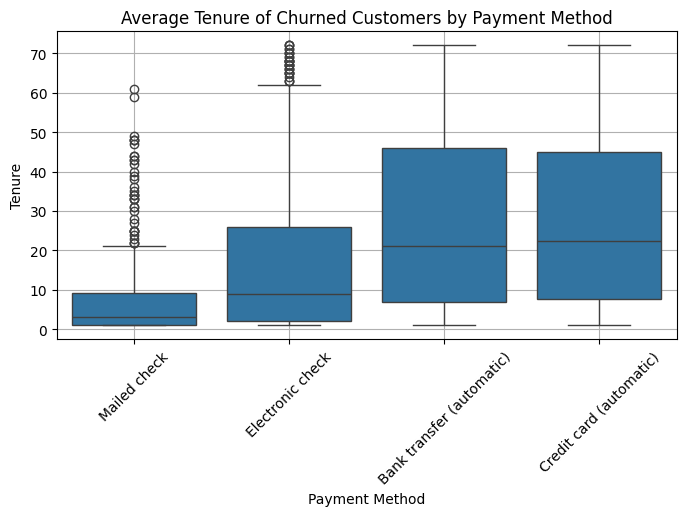

In [35]:
# Plotting the Average tenure of the Churned customers by Payment Method
avg_tenure_payment = churned.groupby("PaymentMethod")["tenure"].mean()
print("Average Tenure of churned customers by Payment Method :\n", avg_tenure_payment)
plt.figure(figsize=(8, 4))
plt.title("Average Tenure of Churned Customers by Payment Method")
sns.boxplot(x="PaymentMethod", y="tenure", data=churned)
plt.xlabel('Payment Method')
plt.ylabel('Tenure')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

 Vsualizing the average monthly charges of customers who have churned, categorized by different payment methods. This illustrates how monthly charges vary among churned customers based on their chosen payment methods, offering insights into billing preferences and potentially influencing factors affecting churn decisions.

Average Monthly Charges of churned customers by Payment Method :
 PaymentMethod
Bank transfer (automatic)    77.875581
Credit card (automatic)      77.356034
Electronic check             78.700980
Mailed check                 54.557143
Name: MonthlyCharges, dtype: float64


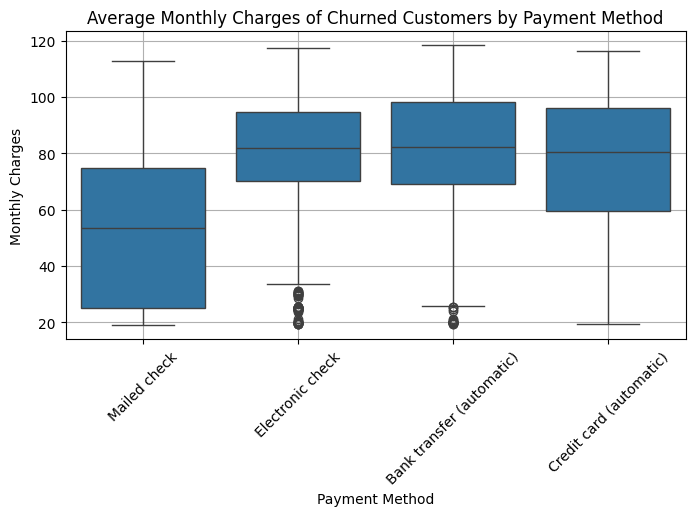

In [36]:
# Plotting the Average Monthly Charges of the Churned customers by Payment Method
avg_monthly_payment = churned.groupby("PaymentMethod")["MonthlyCharges"].mean()
print("Average Monthly Charges of churned customers by Payment Method :\n", avg_monthly_payment)
plt.figure(figsize=(8, 4))
plt.title("Average Monthly Charges of Churned Customers by Payment Method")
sns.boxplot(x="PaymentMethod", y="MonthlyCharges", data=churned)
plt.xlabel('Payment Method')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Visualizing the average total charges of customers who have churned, categorized by different payment methods. This helps in understanding how total charges vary among churned customers based on their chosen payment methods, providing insights into financial aspects influencing customer churn decisions.

Average Total Charges of churned customers by Payment Method :
 PaymentMethod
Bank transfer (automatic)    2269.812984
Credit card (automatic)      2350.257759
Electronic check             1463.656769
Mailed check                  534.022565
Name: TotalCharges, dtype: float64


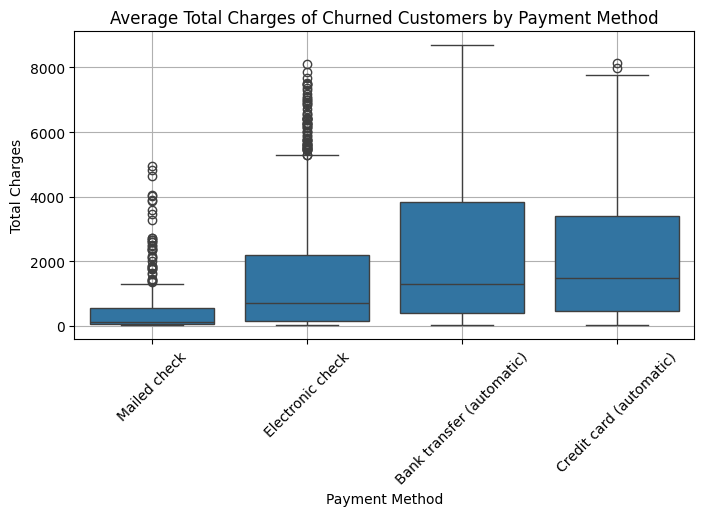

In [37]:
# Plotting the Average Total Charges of the Churned customers by Payment Method
avg_total_payment = churned_copy.groupby("PaymentMethod")["TotalCharges"].mean()
print("Average Total Charges of churned customers by Payment Method :\n", avg_total_payment)
plt.figure(figsize=(8, 4))
plt.title("Average Total Charges of Churned Customers by Payment Method")
sns.boxplot(x="PaymentMethod", y="TotalCharges", data=churned_copy)
plt.xlabel('Payment Method')
plt.ylabel('Total Charges')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

COunting occurrences of customers based on whether they have a partner and dependents then visualizing this data using a pie chart, showing the proportion of customers categorized by combinations of partner and dependents status. This visualization helps in understanding the distribution of family-related demographics among customers in the dataset.

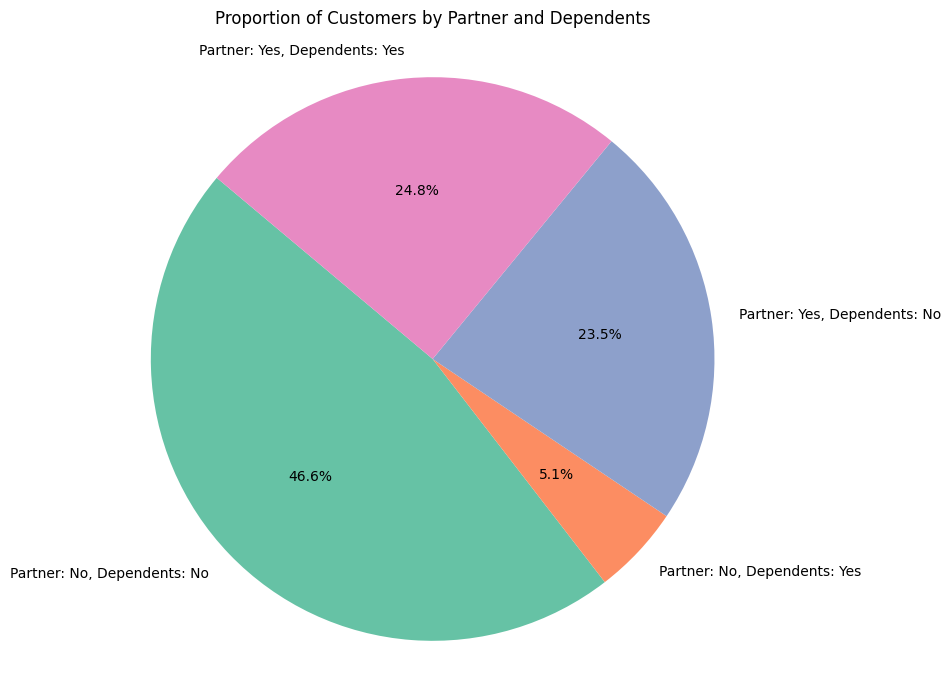

In [10]:
# Counting occurrences of Partner and Dependents
partner_dependents_counts = df.groupby(['Partner', 'Dependents']).size().reset_index(name='Count')

plt.figure(figsize=(8, 8))
plt.pie(partner_dependents_counts['Count'], 
        labels=partner_dependents_counts.apply(lambda x: f"Partner: {x['Partner']}, Dependents: {x['Dependents']}", axis=1), 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])

plt.title('Proportion of Customers by Partner and Dependents', pad=20)  # Adjust pad as needed
plt.axis('equal')
plt.show()


Selecting only numerical columns from a DataFrame (df) and generating a correlation matrix heatmap. The heatmap visually displays the pairwise correlations between these numerical columns, offering insights into the relationships and dependencies among different variables in the dataset.

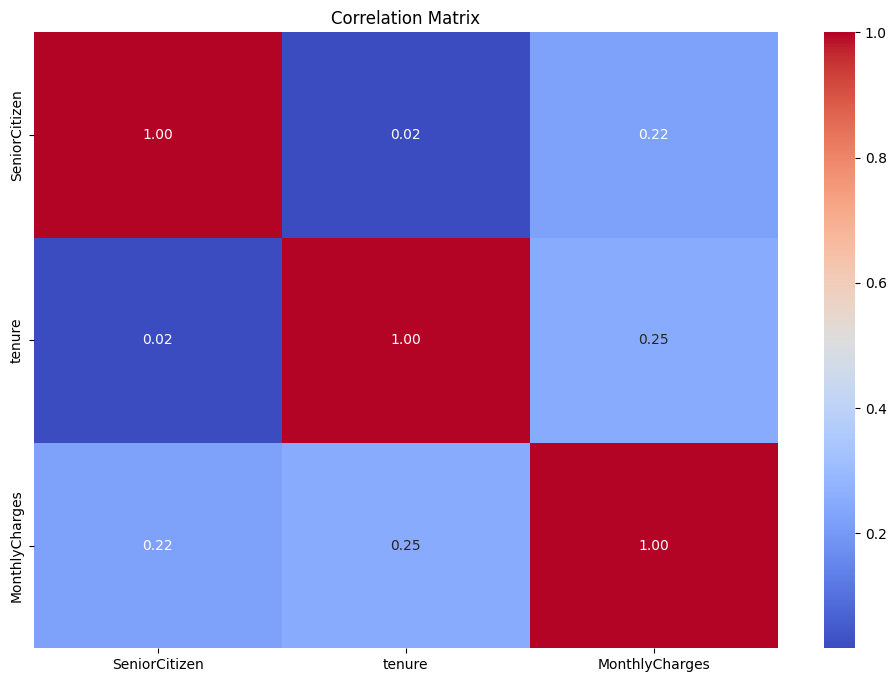

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Statistical test (e.g., t-test) to compare MonthlyCharges between churned and non-churned customers
from scipy.stats import ttest_ind

churned_charges = df[df['Churn'] == 'Yes']['MonthlyCharges']
non_churned_charges = df[df['Churn'] == 'No']['MonthlyCharges']

t_stat, p_value = ttest_ind(churned_charges, non_churned_charges, equal_var=False)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")


T-test: t-statistic = 18.407526676414673, p-value = 8.59244933154705e-73


In [ ]:
from scipy.stats import f_oneway

# Example with MonthlyCharges across different Contract types
contract_groups = []
for contract_type, group in df.groupby('Contract')['MonthlyCharges']:
    contract_groups.append(group)

f_stat, p_value = f_oneway(*contract_groups)
print(f"One-way ANOVA: F-statistic = {f_stat}, p-value = {p_value}")


One-way ANOVA: F-statistic = 20.828045474730274, p-value = 9.575270975935273e-10
